

---



---


# **KLASIFIKASI PENYAKIT PCOS MENGGUNAKAN SMOTE DAN ALOGARITMA RANDOM FOREST.**



---



---


Nama : Luthfia Ridho Damayanti

NIM  : 21.11.4185

## PERSIAPAN DATA

### Import Library

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### Input Dataset

In [2]:
# Import dataset
file_path = '/content/drive/MyDrive/SKRIPSI/ml/PCOS_data_without_infertility (1).xlsx'
df = pd.read_excel(file_path, sheet_name='Full_new', header=0)

### Melihat Dataset

In [3]:
# Preview dataset
print(f"Jumlah sampel: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1] - 1}")
print("\nPreview dataset:")
print(df.head())

Jumlah sampel: 541
Jumlah fitur: 44

Preview dataset:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N) 

## EXPLORATORY DATA ANALYSIS


### 1. Informasi Dataset

In [4]:
# Tampilkan Informasi Data
print("=== Info Data ===")
print(df.info())

=== Info Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           

In [5]:
# Informasi statistik dataset
print("\nInformasi statistik dataset:")
print(df.describe())


Informasi statistik dataset:
           Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.311285    13.802218         73.247689   
std       6.033545    4.056399     1.840812          4.430285   
min     137.000000   12.4

### 2. Distribusi Dataset pada Kolom Target (PCOS (Y/N))

In [6]:
# Cek distribusi kelas pada kolom 'PCOS (Y/N)'
print("Distribusi kelas target:")
print(df['PCOS (Y/N)'].value_counts())

# Persentase kelas 1 (Penderita PCOS)
print(f"Persentase kelas 1 (Penderita PCOS): {df['PCOS (Y/N)'].mean() * 100:.2f}%")

# Persentase kelas 0 (Tidak menderita PCOS)
print(f"Persentase kelas 0 (Tidak menderita PCOS): {(1 - df['PCOS (Y/N)'].mean()) * 100:.2f}%")

Distribusi kelas target:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64
Persentase kelas 1 (Penderita PCOS): 32.72%
Persentase kelas 0 (Tidak menderita PCOS): 67.28%


<function matplotlib.pyplot.show(close=None, block=None)>

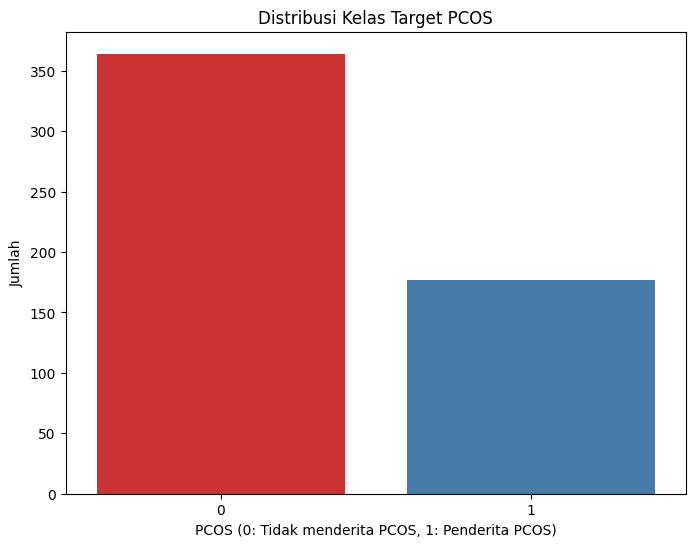

In [7]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='PCOS (Y/N)', data=df, palette='Set1')
plt.title('Distribusi Kelas Target PCOS')
plt.xlabel('PCOS (0: Tidak menderita PCOS, 1: Penderita PCOS)')
plt.ylabel('Jumlah')
plt.show

### 3. Korelasi Fitur

In [8]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

In [9]:
# Korelasi terhadap target
corr_with_target = numerical_df.corr()['PCOS (Y/N)'].drop('PCOS (Y/N)').sort_values(ascending=False)

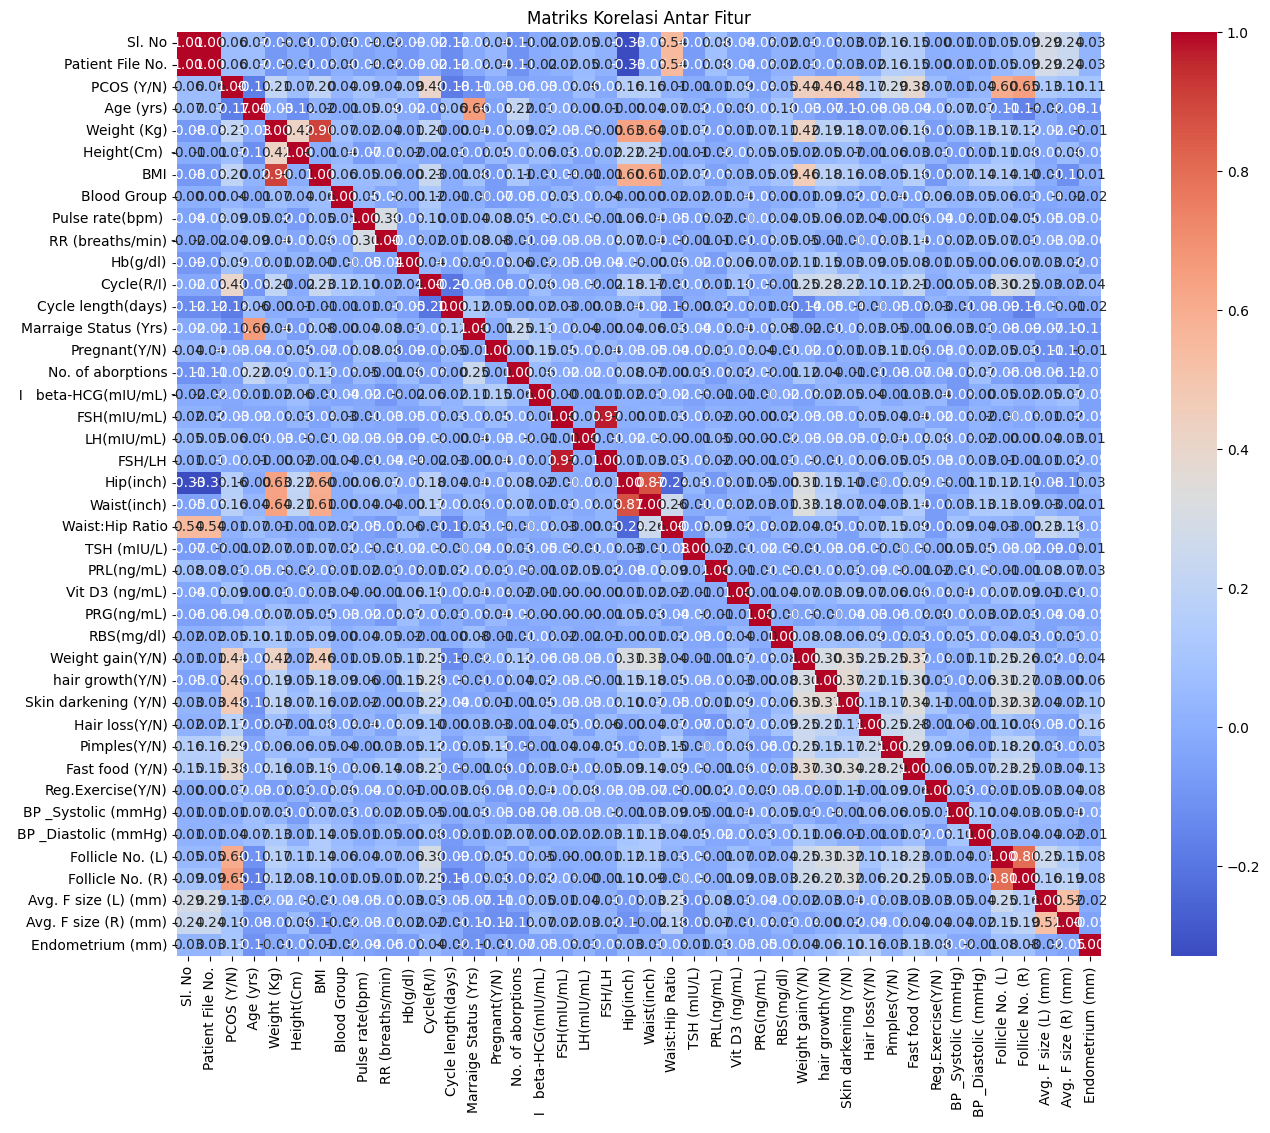

In [10]:
# Visualisasi korelasi fitur
plt.figure(figsize=(18, 12))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

In [11]:
# Cek Korelasi Fitur dengan Target
print("\nKorelasi fitur dengan target:")
print(correlation_matrix['PCOS (Y/N)'].sort_values(ascending=False))


Korelasi fitur dengan target:
PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)        

### 4. Cek Outlier

In [12]:
# Pilih hanya kolom numerik
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                if df[col].nunique() > 6]

# --- Deteksi outlier sebelum capping ---
outlier_before = pd.DataFrame(columns=["Kolom", "Jumlah_Outlier"])
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_before = pd.concat(
        [outlier_before, pd.DataFrame({"Kolom": [col], "Jumlah_Outlier": [outliers.shape[0]]})],
        ignore_index=True
    )

# Tampilkan hasil deteksi awal
print("=== Jumlah Outlier per Kolom Numerik (Sebelum Drop) ===")
print(outlier_before.sort_values(by="Jumlah_Outlier", ascending=False))

=== Jumlah Outlier per Kolom Numerik (Sebelum Drop) ===
                     Kolom Jumlah_Outlier
7         Pulse rate(bpm)              94
10      Cycle length(days)             77
15                  FSH/LH             48
12    I   beta-HCG(mIU/mL)             46
22              PRG(ng/mL)             39
21          Vit D3 (ng/mL)             31
23              RBS(mg/dl)             30
19             TSH (mIU/L)             27
14              LH(mIU/mL)             24
20              PRL(ng/mL)             21
16               Hip(inch)             21
3              Weight (Kg)             18
17             Waist(inch)             17
8         RR (breaths/min)             14
5                      BMI             12
13             FSH(mIU/mL)             12
11   Marraige Status (Yrs)             11
26    Avg. F size (L) (mm)              9
28        Endometrium (mm)              8
9                 Hb(g/dl)              8
4              Height(Cm)               6
24        Follicle N

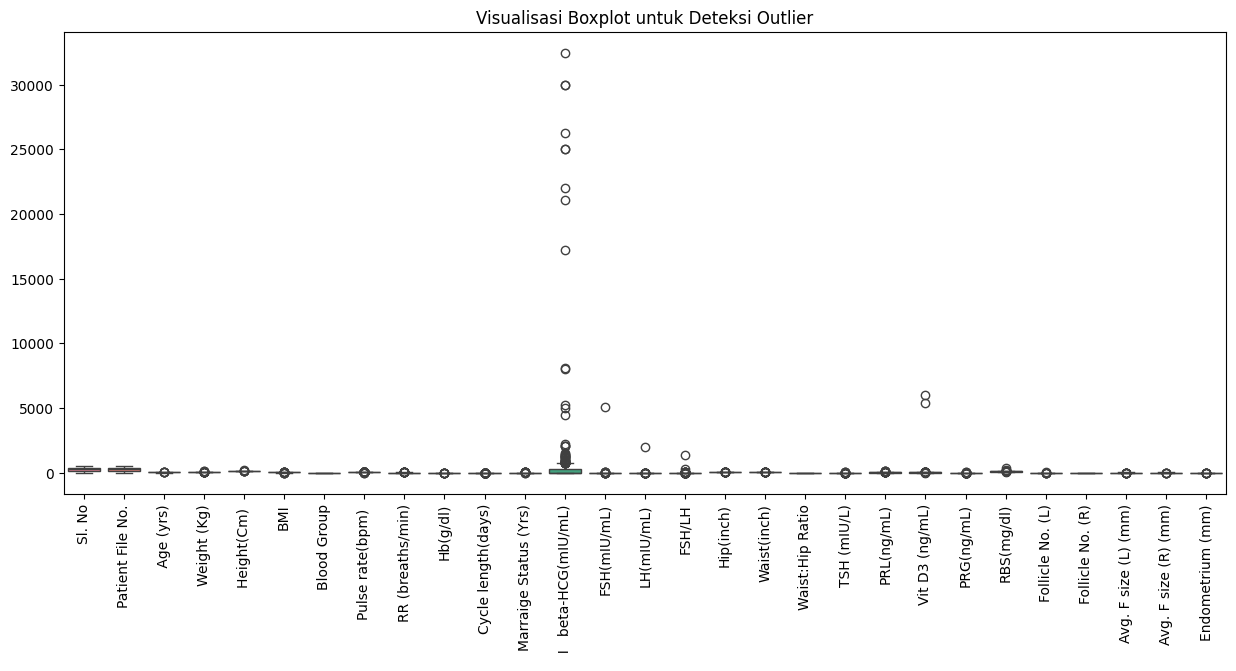

In [13]:
# (Opsional) Visualisasi boxplot untuk melihat sebaran data numerik
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Visualisasi Boxplot untuk Deteksi Outlier")
plt.xticks(rotation=90)
plt.show()

### 5. Cek Missing Value

In [14]:
# Cek nilai yang hilang
print("\nCek nilai yang hilang:")
print(df.isnull().sum())


Cek nilai yang hilang:
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (

## PREPROCESSING DATA





### Data Cleanning




In [15]:
# Hapus kolom tidak relevan
df = df.drop(columns=['Unnamed: 44', 'Sl. No', 'Patient File No.'], errors='ignore')

In [16]:
# Mengatasi missing value pada kolom Marriage Status dengan median
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median())

In [17]:
# Imputasi missing value dengan median untuk kolom fast food
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median())

In [18]:
# Cek missing value setelah diproses
print("\nMissing value setelah imputasi:")
print(df.isnull().sum())


Missing value setelah imputasi:
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/

In [19]:
# Identifikasi kolom
target_col = 'PCOS (Y/N)'
num_cols = df.drop(columns=target_col).columns.tolist()

# Membersihkan nilai numerik (hapus titik/koma yang ganggu)
for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'\.$', '', regex=True)      # hapus titik di akhir
        .str.replace(',', '.', regex=False)       # ganti koma jadi titik
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')  # konversi ke float


In [20]:
# Membatasi angka desimal menjadi 2 digit di semua kolom numerik
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].round(2)

### Penanganan outlier

In [21]:
# Pilih hanya kolom numerik
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                if df[col].nunique() > 6]

In [22]:
df_capped = df.copy()

for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Gantikan nilai di bawah/atas batas dengan batas tersebut
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,
                              np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))

In [23]:
outlier_after = pd.DataFrame(columns=["Kolom", "Jumlah_Outlier"])

for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_capped[(df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)]
    outlier_after = pd.concat(
        [outlier_after, pd.DataFrame({"Kolom": [col], "Jumlah_Outlier": [outliers.shape[0]]})],
        ignore_index=True
    )

print("\n=== Jumlah Outlier per Kolom Numerik (Sesudah Capping) ===")
print(outlier_after.sort_values(by="Jumlah_Outlier", ascending=False))


=== Jumlah Outlier per Kolom Numerik (Sesudah Capping) ===
                     Kolom Jumlah_Outlier
0                Age (yrs)              0
15               Hip(inch)              0
27    Avg. F size (R) (mm)              0
26    Avg. F size (L) (mm)              0
25        Follicle No. (R)              0
24        Follicle No. (L)              0
23              RBS(mg/dl)              0
22              PRG(ng/mL)              0
21          Vit D3 (ng/mL)              0
20              PRL(ng/mL)              0
19              AMH(ng/mL)              0
18             TSH (mIU/L)              0
17         Waist:Hip Ratio              0
16             Waist(inch)              0
14                  FSH/LH              0
1              Weight (Kg)              0
13              LH(mIU/mL)              0
12             FSH(mIU/mL)              0
11  II    beta-HCG(mIU/mL)              0
10    I   beta-HCG(mIU/mL)              0
9    Marraige Status (Yrs)              0
8       Cycle le

In [24]:
# Bandingkan jumlah outlier pada setiap kolom
comparison = outlier_before.merge(outlier_after, on="Kolom", suffixes=("_Sebelum", "_Sesudah"))
comparison["Perubahan"] = comparison["Jumlah_Outlier_Sebelum"] - comparison["Jumlah_Outlier_Sesudah"]

print("\n=== Perbandingan Jumlah Outlier Sebelum vs Sesudah Capping ===")
print(comparison.sort_values(by="Perubahan", ascending=False))


=== Perbandingan Jumlah Outlier Sebelum vs Sesudah Capping ===
                     Kolom Jumlah_Outlier_Sebelum Jumlah_Outlier_Sesudah  \
5         Pulse rate(bpm)                      94                      0   
8       Cycle length(days)                     77                      0   
13                  FSH/LH                     48                      0   
10    I   beta-HCG(mIU/mL)                     46                      0   
20              PRG(ng/mL)                     39                      0   
19          Vit D3 (ng/mL)                     31                      0   
21              RBS(mg/dl)                     30                      0   
17             TSH (mIU/L)                     27                      0   
12              LH(mIU/mL)                     24                      0   
18              PRL(ng/mL)                     21                      0   
14               Hip(inch)                     21                      0   
1              Weight (K

In [25]:
print(f"\nJumlah data sebelum preprocessing: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Jumlah data sesudah preprocessing (capping): {df_capped.shape[0]} baris, {df_capped.shape[1]} kolom")


Jumlah data sebelum preprocessing: 541 baris, 42 kolom
Jumlah data sesudah preprocessing (capping): 541 baris, 42 kolom


In [26]:
# Bandingkan jumlah data
print("\n=== Perbandingan Jumlah Data ===")
print(f"Sebelum preprocessing & penanganan outlier: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Sesudah preprocessing & penanganan outlier: {df.shape[0]} baris, {df.shape[1]} kolom")


=== Perbandingan Jumlah Data ===
Sebelum preprocessing & penanganan outlier: 541 baris, 42 kolom
Sesudah preprocessing & penanganan outlier: 541 baris, 42 kolom


### Split Data

In [27]:
# Memisahkan fitur dan target
X = df.drop(columns=['PCOS (Y/N)'])  # Fitur (semua kolom kecuali target)
y = df['PCOS (Y/N)']                 # Target

# Menampilkan bentuk data
print("Shape X (fitur):", X.shape)
print("Shape y (target):", y.shape)

Shape X (fitur): (541, 41)
Shape y (target): (541,)


### Train-Test Split

In [28]:
# Membagi data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Menampilkan bentuk data hasil split
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (432, 41)
Ukuran X_test: (109, 41)
Ukuran y_train: (432,)
Ukuran y_test: (109,)


In [29]:
def show_class_distribution(label, y_data):
    total = len(y_data)
    counts = y_data.value_counts()
    print(f"\nDistribusi kelas pada {label}:")
    for cls, cnt in counts.items():
        print(f"  Kelas {cls}: {cnt} sampel ({cnt/total:.2%})")

show_class_distribution("seluruh data", y)
show_class_distribution("data train", y_train)
show_class_distribution("data test", y_test)


Distribusi kelas pada seluruh data:
  Kelas 0: 364 sampel (67.28%)
  Kelas 1: 177 sampel (32.72%)

Distribusi kelas pada data train:
  Kelas 0: 287 sampel (66.44%)
  Kelas 1: 145 sampel (33.56%)

Distribusi kelas pada data test:
  Kelas 0: 77 sampel (70.64%)
  Kelas 1: 32 sampel (29.36%)


### Mengisi nilai kosong pada data test dengan median


In [30]:
imputer = SimpleImputer(strategy='median')

# Fit-transform hanya di train, lalu transform di test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

### Feature Importance

In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Ambil importance
importances = rf.feature_importances_
feature_names = X_train.columns

# DataFrame untuk ranking fitur
feat_imp_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [33]:
# Tampilkan tabel feature importance
print("\n=== Feature Importance (Setelah Preprocessing) ===")
print(feat_imp_df)


=== Feature Importance (Setelah Preprocessing) ===
                     Fitur  Importance
37        Follicle No. (R)    0.204646
36        Follicle No. (L)    0.129713
29    Skin darkening (Y/N)    0.062251
27        Weight gain(Y/N)    0.052442
28        hair growth(Y/N)    0.043082
22              AMH(ng/mL)    0.041769
8               Cycle(R/I)    0.028954
16              LH(mIU/mL)    0.022624
0                Age (yrs)    0.021334
17                  FSH/LH    0.020900
9       Cycle length(days)    0.020191
21             TSH (mIU/L)    0.018180
1              Weight (Kg)    0.018084
10   Marraige Status (Yrs)    0.017713
3                      BMI    0.017388
15             FSH(mIU/mL)    0.017128
18               Hip(inch)    0.016866
31            Pimples(Y/N)    0.016734
39    Avg. F size (R) (mm)    0.016547
40        Endometrium (mm)    0.015896
25              PRG(ng/mL)    0.015198
26              RBS(mg/dl)    0.014115
2              Height(Cm)     0.014033
32         F

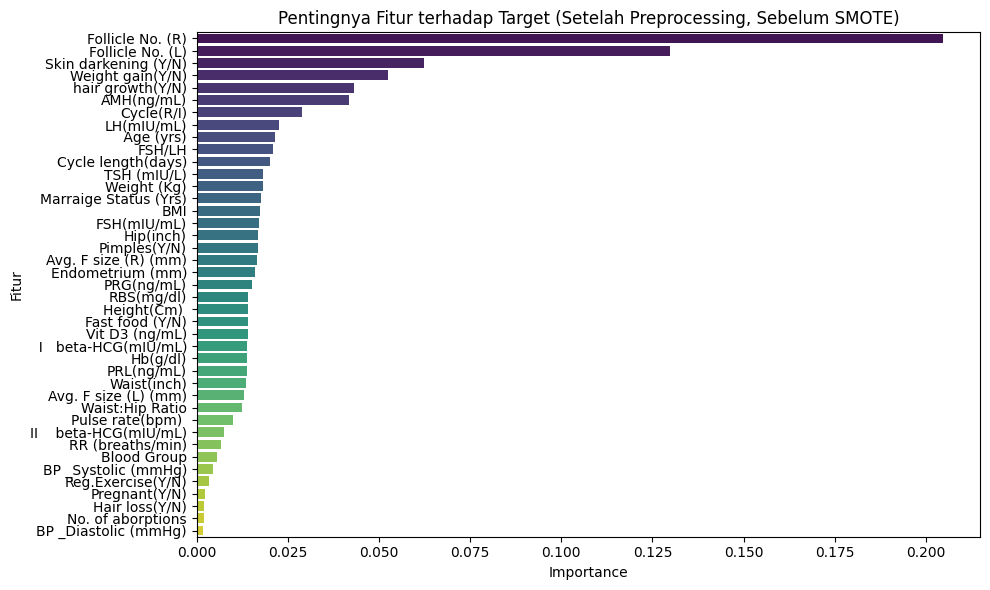

In [34]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=feat_imp_df, palette='viridis')
plt.title("Pentingnya Fitur terhadap Target (Setelah Preprocessing, Sebelum SMOTE)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

### Memilih fitur penting untuk modelling

In [35]:
# Pilih fitur secara manual berdasarkan analisis
selected_features = [
    'Follicle No. (R)',
    'Follicle No. (L)',
    'Skin darkening (Y/N)',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'AMH(ng/mL)',
    'Cycle(R/I)',
    'LH(mIU/mL)',
    ' Age (yrs)',
    'FSH(mIU/mL)'
]

In [36]:
# Filter data hanya dengan fitur yang dipilih
X_train_sel = pd.DataFrame(X_train_imputed, columns=X_train.columns)[selected_features]
X_test_sel = pd.DataFrame(X_test_imputed, columns=X_test.columns)[selected_features]

## MODELLING

### 1. Modelling tanpa SMOTE menggunakan grid **search**

In [37]:
# Mencari max_depth & n_estimators
param_grid_1_nosmote = {
    'max_depth': range(1, 21),         # 1 - 20
    'n_estimators': range(10, 101, 10) # 10 - 100
}

grid_1_nosmote = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_1_nosmote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_1_nosmote.fit(X_train_sel, y_train)

best_max_depth_nosmote = grid_1_nosmote.best_params_['max_depth']
best_n_estimators_nosmote = grid_1_nosmote.best_params_['n_estimators']

print("Tahap 1 - Best Params:", grid_1_nosmote.best_params_)
print("Tahap 1 - Best Accuracy:", grid_1_nosmote.best_score_)

Tahap 1 - Best Params: {'max_depth': 7, 'n_estimators': 80}
Tahap 1 - Best Accuracy: 0.9143544506816358


In [38]:
# Mencari min_samples_leaf
param_grid_2_nosmote = {
    'min_samples_leaf': range(1, 11) # 1 - 10
}

grid_2_nosmote = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth_nosmote,
        n_estimators=best_n_estimators_nosmote
    ),
    param_grid_2_nosmote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_2_nosmote.fit(X_train_sel, y_train)
best_min_samples_leaf_nosmote = grid_2_nosmote.best_params_['min_samples_leaf']

print("Tahap 2 - Best Params:", grid_2_nosmote.best_params_)
print("Tahap 2 - Best Accuracy:", grid_2_nosmote.best_score_)

Tahap 2 - Best Params: {'min_samples_leaf': 1}
Tahap 2 - Best Accuracy: 0.9143544506816358


In [39]:
# Mencari min_samples_split
param_grid_3_nosmote = {
    'min_samples_split': range(2, 11) # 2 - 10
}

grid_3_nosmote = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth_nosmote,
        n_estimators=best_n_estimators_nosmote,
        min_samples_leaf=best_min_samples_leaf_nosmote
    ),
    param_grid_3_nosmote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_3_nosmote.fit(X_train_sel, y_train)
best_min_samples_split_nosmote = grid_3_nosmote.best_params_['min_samples_split']

print("Tahap 3 - Best Params:", grid_3_nosmote.best_params_)
print("Tahap 3 - Best Accuracy:", grid_3_nosmote.best_score_)

Tahap 3 - Best Params: {'min_samples_split': 2}
Tahap 3 - Best Accuracy: 0.9143544506816358


In [40]:
# Final Model tanpa SMOTE
final_model_nosmote = RandomForestClassifier(
    random_state=42,
    max_depth=best_max_depth_nosmote,
    n_estimators=best_n_estimators_nosmote,
    min_samples_leaf=best_min_samples_leaf_nosmote,
    min_samples_split=best_min_samples_split_nosmote
)

final_model_nosmote.fit(X_train_sel, y_train)

# 6. Evaluasi Model
y_pred_nosmote = final_model_nosmote.predict(X_test_sel)

print("\nFinal Model Evaluation (Tanpa SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_nosmote))
print(classification_report(y_test, y_pred_nosmote))


Final Model Evaluation (Tanpa SMOTE):
Accuracy: 0.8715596330275229
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        77
           1       0.80      0.75      0.77        32

    accuracy                           0.87       109
   macro avg       0.85      0.84      0.84       109
weighted avg       0.87      0.87      0.87       109



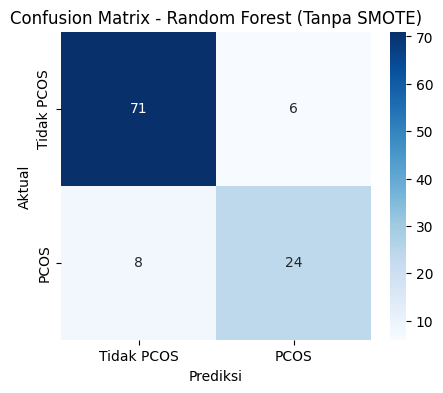

In [41]:
# Confusion Matrix untuk model Non-SMOTE
cm_nosmote = confusion_matrix(y_test, y_pred_nosmote)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nosmote, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Tidak PCOS", "PCOS"],
            yticklabels=["Tidak PCOS", "PCOS"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest (Tanpa SMOTE)")
plt.show()

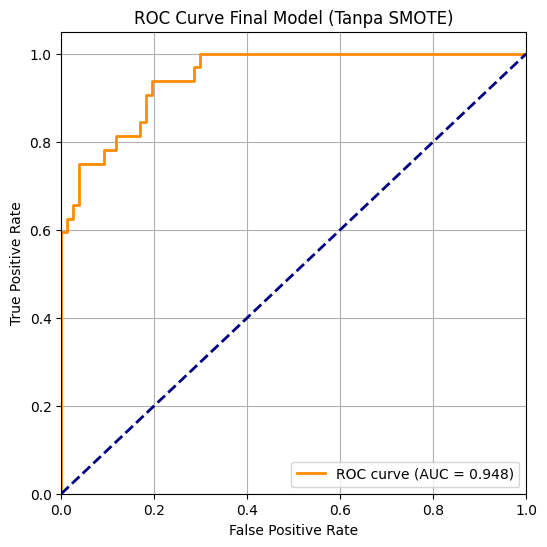

In [42]:
# Prediksi probabilitas class 1
y_pred_proba_nosmote = final_model_nosmote.predict_proba(X_test_sel)[:, 1]

# Hitung FPR, TPR, dan threshold
fpr_nosmote, tpr_nosmote, thresholds_nosmote = roc_curve(y_test, y_pred_proba_nosmote)
roc_auc_nosmote = auc(fpr_nosmote, tpr_nosmote)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_nosmote, tpr_nosmote, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc_nosmote:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Final Model (Tanpa SMOTE)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [43]:
# Print nilai AUC
print(f"AUC (Tanpa SMOTE): {roc_auc_nosmote:.3f}")

AUC (Tanpa SMOTE): 0.948


## SMOTE

In [44]:
# SMOTE pada data train dengan fitur yang dipilih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sel, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_train_smote.value_counts())

Sebelum SMOTE: PCOS (Y/N)
0    287
1    145
Name: count, dtype: int64
Sesudah SMOTE: PCOS (Y/N)
1    287
0    287
Name: count, dtype: int64


In [45]:
# Menggabungkan hasil SMOTE menjadi DataFrame
df_train_smote = pd.DataFrame(X_train_smote, columns=X_train_sel.columns)
df_train_smote['PCOS (Y/N)'] = y_train_smote.values

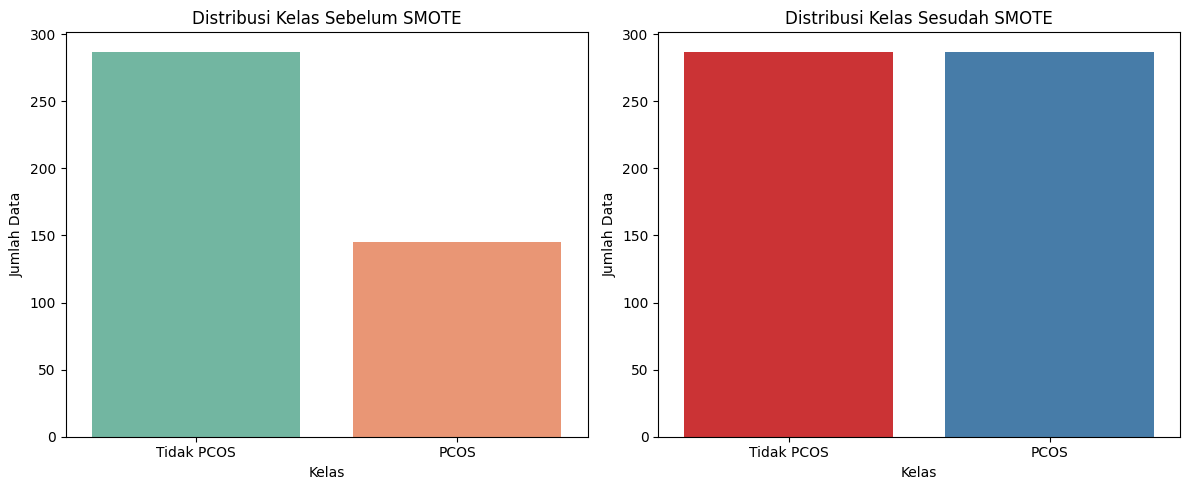

In [46]:
# Plot sebelum SMOTE
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="Set2")
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.xticks([0, 1], ["Tidak PCOS", "PCOS"])

# Plot sesudah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette="Set1")
plt.title("Distribusi Kelas Sesudah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.xticks([0, 1], ["Tidak PCOS", "PCOS"])

plt.tight_layout()
plt.show()

In [47]:
# Simpan ke file CSV
df_train_smote.to_csv('hasil_smote.csv', index=False)
print("Dataset hasil SMOTE berhasil disimpan sebagai 'hasil_smote.csv'")

Dataset hasil SMOTE berhasil disimpan sebagai 'hasil_smote.csv'


### 2. Modelling memakai SMOTE dengan grid search

In [48]:
# Mencari max_depth & n_estimators
param_grid_1 = {
    'max_depth': range(1, 21),         # 1 - 20
    'n_estimators': range(10, 101, 10) # 10 - 100 (kelipatan 10)
}

grid_1 = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_1.fit(X_train_smote, y_train_smote)

print("Tahap 1 - Best Params:", grid_1.best_params_)
print("Tahap 1 - Best Accuracy:", grid_1.best_score_)

best_max_depth = grid_1.best_params_['max_depth']
best_n_estimators = grid_1.best_params_['n_estimators']

Tahap 1 - Best Params: {'max_depth': 8, 'n_estimators': 70}
Tahap 1 - Best Accuracy: 0.9407475209763538


In [49]:
# Mencari min_samples_leaf
param_grid_2 = {
    'min_samples_leaf': range(1, 11) # 1 - 10
}

grid_2 = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth,
        n_estimators=best_n_estimators
    ),
    param_grid_2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_2.fit(X_train_smote, y_train_smote)

print("Tahap 2 - Best Params:", grid_2.best_params_)
print("Tahap 2 - Best Accuracy:", grid_2.best_score_)

best_min_samples_leaf = grid_2.best_params_['min_samples_leaf']

Tahap 2 - Best Params: {'min_samples_leaf': 1}
Tahap 2 - Best Accuracy: 0.9407475209763538


In [50]:
# Mencari min_samples_split
param_grid_3 = {
    'min_samples_split': range(2, 11) # 2 - 10
}

grid_3 = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        max_depth=best_max_depth,
        n_estimators=best_n_estimators,
        min_samples_leaf=best_min_samples_leaf
    ),
    param_grid_3,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_3.fit(X_train_smote, y_train_smote)

print("Tahap 3 - Best Params:", grid_3.best_params_)
print("Tahap 3 - Best Accuracy:", grid_3.best_score_)

best_min_samples_split = grid_3.best_params_['min_samples_split']

Tahap 3 - Best Params: {'min_samples_split': 2}
Tahap 3 - Best Accuracy: 0.9407475209763538


In [51]:
# Final Model dengan semua best params
final_model = RandomForestClassifier(
    random_state=42,
    max_depth=best_max_depth,
    n_estimators=best_n_estimators,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split
)

final_model.fit(X_train_smote, y_train_smote)
y_pred = final_model.predict(X_test_sel)

print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Final Model Evaluation:
Accuracy: 0.8899082568807339
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        77
           1       0.83      0.78      0.81        32

    accuracy                           0.89       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.89      0.89      0.89       109



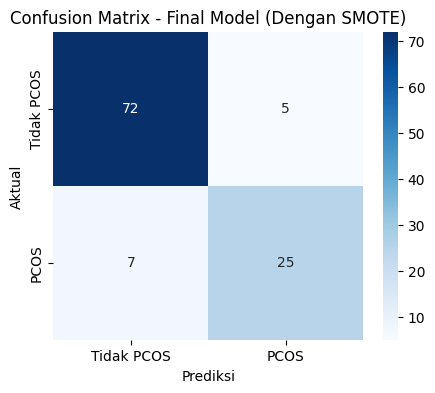

In [52]:
# Confusion Matrix untuk model SMOTE
y_pred = final_model.predict(X_test_sel)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Tidak PCOS", "PCOS"],
            yticklabels=["Tidak PCOS", "PCOS"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Final Model (Dengan SMOTE)")
plt.show()


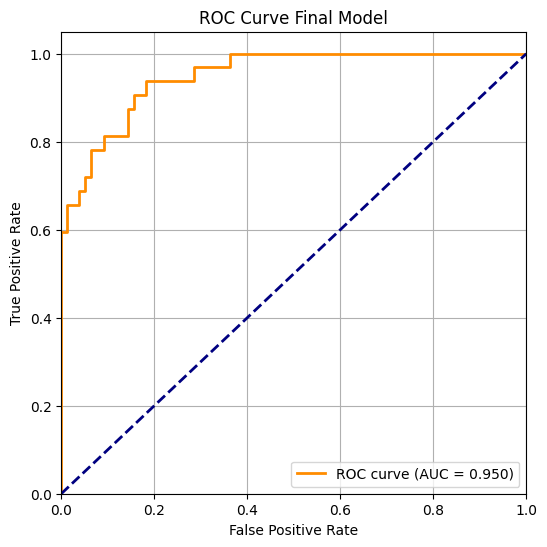

In [53]:
# Prediksi probabilitas untuk ROC Curve
y_pred_proba = final_model.predict_proba(X_test_sel)[:, 1]  # mengambil probabilitas class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Final Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [54]:
# Print nilai AUC
print(f"AUC: {roc_auc:.3f}")

AUC: 0.950


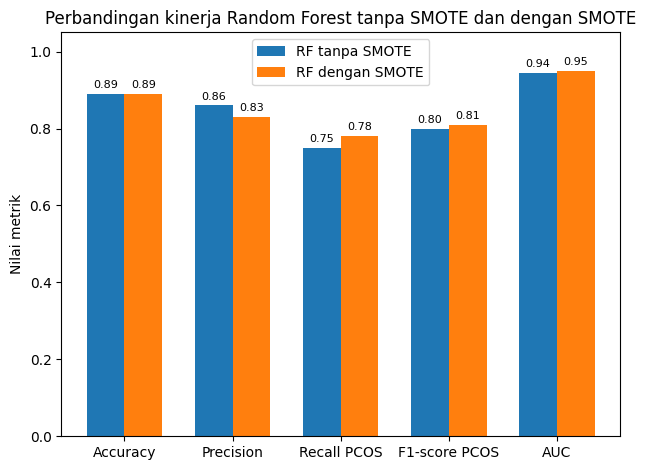

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Metrik yang akan dibandingkan
metrics = ['Accuracy','Precision', 'Recall PCOS', 'F1-score PCOS', 'AUC']

# Nilai masing-masing metrik
rf_no_smote = [0.89, 0.86, 0.75, 0.80, 0.945]
rf_smote    = [0.89, 0.83, 0.78, 0.81, 0.950]

x = np.arange(len(metrics))  # posisi metrik di sumbu X
width = 0.35                  # lebar batang

fig, ax = plt.subplots()

# Dua batang berdampingan
ax.bar(x - width/2, rf_no_smote, width, label='RF tanpa SMOTE')
ax.bar(x + width/2, rf_smote, width, label='RF dengan SMOTE')

# Label dan judul
ax.set_ylabel('Nilai metrik')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)  # karena skala 0–1
ax.set_title('Perbandingan kinerja Random Forest tanpa SMOTE dan dengan SMOTE')
ax.legend()

# Menampilkan nilai di atas batang (opsional, tapi keren untuk skripsi)
for i, v in enumerate(rf_no_smote):
    ax.text(x[i] - width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(rf_smote):
    ax.text(x[i] + width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Menyimpan Model

In [58]:
import pickle

# Gabungkan model + fitur jadi 1 dictionary
bundle = {
    "model": final_model,
    "features": selected_features
}

# Simpan ke file .sav dengan pickle
with open("finalmodel_terbaru_klasifikasiPCOS.sav", "wb") as f:
    pickle.dump(bundle, f)

print("Model + fitur penting berhasil disimpan dengan pickle (.sav)!")

Model + fitur penting berhasil disimpan dengan pickle (.sav)!


In [57]:
import sklearn
print(sklearn.__version__)


1.6.1
